<a href="https://colab.research.google.com/github/siddhi5470/Teddy-Techies_hackgenx/blob/main/HACKGENX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = '/content/Medical_Device_Failure_dataset.csv'
df = pd.read_csv(file_path)

In [5]:
print(df.columns)

Index(['Device_ID', 'Device_Type', 'Purchase_Date', 'Age', 'Manufacturer',
       'Model', 'Country', 'Maintenance_Cost', 'Downtime',
       'Maintenance_Frequency', 'Failure_Event_Count', 'Maintenance_Class',
       'Maintenance_Report'],
      dtype='object')


In [6]:
#Finding missing values in %
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n", missing_percentage)

Percentage of missing values:
 Device_ID                0.0
Device_Type              0.0
Purchase_Date            0.0
Age                      0.0
Manufacturer             0.0
Model                    0.0
Country                  0.0
Maintenance_Cost         0.0
Downtime                 0.0
Maintenance_Frequency    0.0
Failure_Event_Count      0.0
Maintenance_Class        0.0
Maintenance_Report       0.0
dtype: float64


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"First 6 Unique Values: {unique_values[:6]}")
    print(f"Total Unique Values: {len(unique_values)}\n")

Column: Device_ID
First 6 Unique Values: ['MD03449' 'MD02024' 'MD04239' 'MD00153' 'MD03743' 'MD01925']
Total Unique Values: 4149

Column: Device_Type
First 6 Unique Values: ['Defibrillator' 'Infusion Pump' 'MRI Scanner' 'X-Ray Machine'
 'PET Scanner' 'CT Scanner']
Total Unique Values: 6

Column: Purchase_Date
First 6 Unique Values: ['2018-04-23' '2020-12-10' '2023-11-22' '2021-03-03' '2019-05-16'
 '2019-06-19']
Total Unique Values: 2563

Column: Age
First 6 Unique Values: [ 7  5  2  4  6 12]
Total Unique Values: 12

Column: Manufacturer
First 6 Unique Values: ['CardioSync' 'MedEquip' 'ImagingTech' 'RescueTech' 'UltraMed' 'ScanPro']
Total Unique Values: 6

Column: Model
First 6 Unique Values: ['Model-100' 'Model-650' 'Model-450' 'Model-250' 'Model-600' 'Model-550']
Total Unique Values: 12

Column: Country
First 6 Unique Values: ['France' 'Italy' 'UK' 'Canada' 'Japan' 'USA']
Total Unique Values: 6

Column: Maintenance_Cost
First 6 Unique Values: [ 7115.34958506  7290.78065849  5635.52178


# **Converting Categorical to Numerical**
```



In [8]:
# Load the original ordinal encoded dataset
df = pd.read_csv("/content/Medical_Device_Failure_dataset.csv")

# Convert 'Purchase_Date' to datetime
purchase_date_numeric = pd.to_datetime(df['Purchase_Date'])
reference_date = purchase_date_numeric.min()
purchase_date_numeric = (purchase_date_numeric - reference_date).dt.days

# Create a new dataset with numeric 'Purchase_Date'
df_updated = df.copy()
df_updated['Purchase_Date'] = purchase_date_numeric

# Save the updated dataset with numeric dates
df_updated.to_csv("/content/date_normalized_dataset.csv", index=False)

# Optional: Preview
print(df_updated.head())


  Device_ID    Device_Type  Purchase_Date  Age Manufacturer      Model  \
0   MD03449  Defibrillator           1836    7   CardioSync  Model-100   
1   MD02024  Infusion Pump           2798    5     MedEquip  Model-650   
2   MD04239    MRI Scanner           3875    2  ImagingTech  Model-650   
3   MD00153  Defibrillator           2881    4   RescueTech  Model-450   
4   MD03743  Defibrillator           2224    6   RescueTech  Model-450   

  Country  Maintenance_Cost   Downtime  Maintenance_Frequency  \
0  France       7115.349585   7.933824                      3   
1   Italy       7290.780658   7.838711                      3   
2  France       5635.521788  13.911045                      1   
3      UK       5001.360188  29.059510                      3   
4  Canada       7555.132928  13.942355                      4   

   Failure_Event_Count  Maintenance_Class  \
0                    0                  1   
1                    4                  2   
2                    2       

In [9]:
# Load the dataset
file_path = "/content/date_normalized_dataset.csv"
df = pd.read_csv(file_path)

categorical_columns = [
    "Device_ID", "Device_Type", "Manufacturer", "Model", "Country",
    "Maintenance_Report"
]

# Target variable
target_column = "Maintenance_Frequency"

# Convert target column to numeric codes if it's categorical
df[target_column] = df[target_column].astype('category')
df["Maintenance_Frequency"] = df[target_column].cat.codes

# Create a copy of the dataset
df_encoded = df.copy()

# Apply Target Encoding
for col in categorical_columns:
    mean_target = df.groupby(col)["Maintenance_Frequency"].mean()
    df_encoded[col] = df[col].map(mean_target).round().astype(int)

# Save the encoded dataset
encoded_file_path = "target_encoded_dataset.csv"
df_encoded.to_csv(encoded_file_path, index=False)

print(f"Target encoded dataset saved at: {encoded_file_path}")


Target encoded dataset saved at: target_encoded_dataset.csv


In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Load your dataset
df = pd.read_csv("/content/date_normalized_dataset.csv")

# Define the columns to encode
columns_to_encode = ["Device_ID", "Device_Type", "Manufacturer", "Model", "Country","Maintenance_Report"]
# Initialize OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Apply Ordinal Encoding directly to selected columns (in-place)
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])
df[columns_to_encode] = df[columns_to_encode].abs()

# Print the modified DataFrame
print(df.head())

# Save the transformed dataset (Optional)
df.to_csv("ordinal encoded_dataset.csv", index=False)


   Device_ID  Device_Type  Purchase_Date  Age  Manufacturer  Model  Country  \
0     2614.0          1.0           1836    7           0.0    0.0      1.0   
1     1530.0          2.0           2798    5           2.0   11.0      2.0   
2     3205.0          3.0           3875    2           1.0   11.0      1.0   
3      123.0          1.0           2881    4           3.0    7.0      4.0   
4     2839.0          1.0           2224    6           3.0    7.0      0.0   

   Maintenance_Cost   Downtime  Maintenance_Frequency  Failure_Event_Count  \
0       7115.349585   7.933824                      3                    0   
1       7290.780658   7.838711                      3                    4   
2       5635.521788  13.911045                      1                    2   
3       5001.360188  29.059510                      3                    1   
4       7555.132928  13.942355                      4                    4   

   Maintenance_Class  Maintenance_Report  
0            

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv("/content/ordinal encoded_dataset.csv")

# Columns to normalize
columns_to_normalize = ["Device_ID", "Purchase_Date", "Maintenance_Cost", "Downtime"]

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Save or view the result
print(df.head())
# Optionally save to a new file
df.to_csv("normalized_dataset.csv", index=False)

   Device_ID  Device_Type  Purchase_Date  Age  Manufacturer  Model  Country  \
0   0.630183          1.0       0.457171    7           0.0    0.0      1.0   
1   0.368852          2.0       0.696713    5           2.0   11.0      2.0   
2   0.772662          3.0       0.964890    2           1.0   11.0      1.0   
3   0.029653          1.0       0.717380    4           3.0    7.0      4.0   
4   0.684426          1.0       0.553785    6           3.0    7.0      0.0   

   Maintenance_Cost  Downtime  Maintenance_Frequency  Failure_Event_Count  \
0          0.316166  0.210338                      3                    0   
1          0.320478  0.207473                      3                    4   
2          0.279794  0.390361                      1                    2   
3          0.264207  0.846604                      3                    1   
4          0.326976  0.391304                      4                    4   

   Maintenance_Class  Maintenance_Report  
0                  

#  Exploratory Data Analytics

Text(0, 0.5, 'Number of Devices')

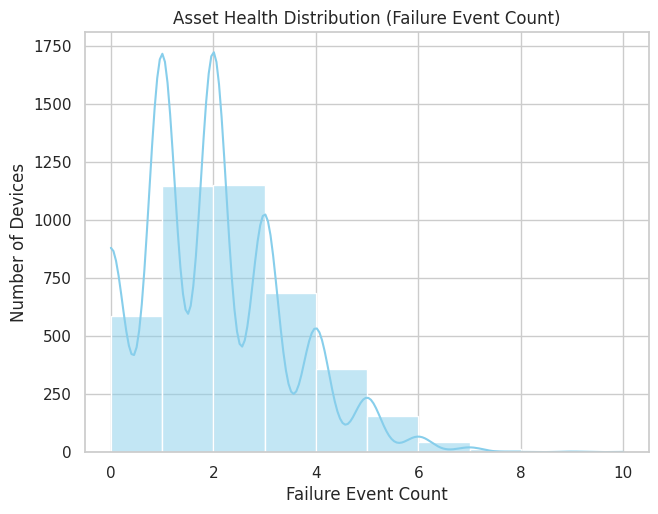

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Medical_Device_Failure_dataset.csv")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# 1. Asset Health Distribution (Failure Event Count)
plt.subplot(2, 2, 1)
sns.histplot(df['Failure_Event_Count'], bins=10, kde=True, color="skyblue")
plt.title("Asset Health Distribution (Failure Event Count)")
plt.xlabel("Failure Event Count")
plt.ylabel("Number of Devices")

<ipython-input-10-c9a3194b6ceb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette="viridis")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ScanPro'),
  Text(1, 0, 'ImagingTech'),
  Text(2, 0, 'MedEquip'),
  Text(3, 0, 'RescueTech'),
  Text(4, 0, 'CardioSync'),
  Text(5, 0, 'UltraMed')])

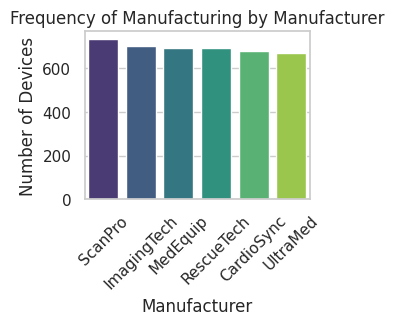

In [ ]:
# 2. Frequency of Manufacturing by Manufacturer
plt.subplot(2, 2, 2)
manufacturer_counts = df['Manufacturer'].value_counts()
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette="viridis")
plt.title("Frequency of Manufacturing by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Devices")
plt.xticks(rotation=45)

<ipython-input-11-08200051196a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lifecycle.index, y=avg_lifecycle.values, palette="cubehelix")


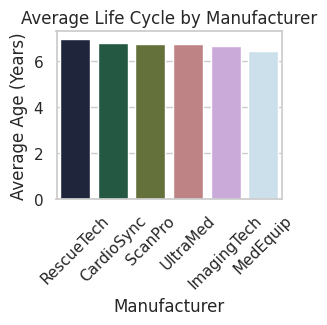

In [ ]:
# 3. Average Life Cycle by Manufacturer (Age)
plt.subplot(2, 2, 4)
avg_lifecycle = df.groupby("Manufacturer")["Age"].mean().sort_values(ascending=False)
sns.barplot(x=avg_lifecycle.index, y=avg_lifecycle.values, palette="cubehelix")
plt.title("Average Life Cycle by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Average Age (Years)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-419462f912a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Device_Type", y="Failure_Event_Count", palette="cool")


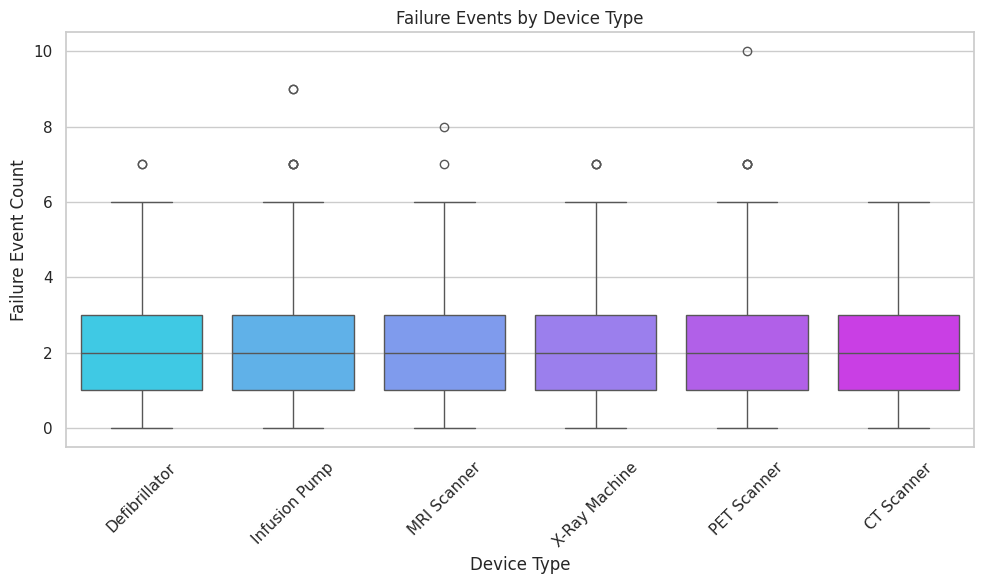

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Device_Type", y="Failure_Event_Count", palette="cool")
plt.title("Failure Events by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Failure Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


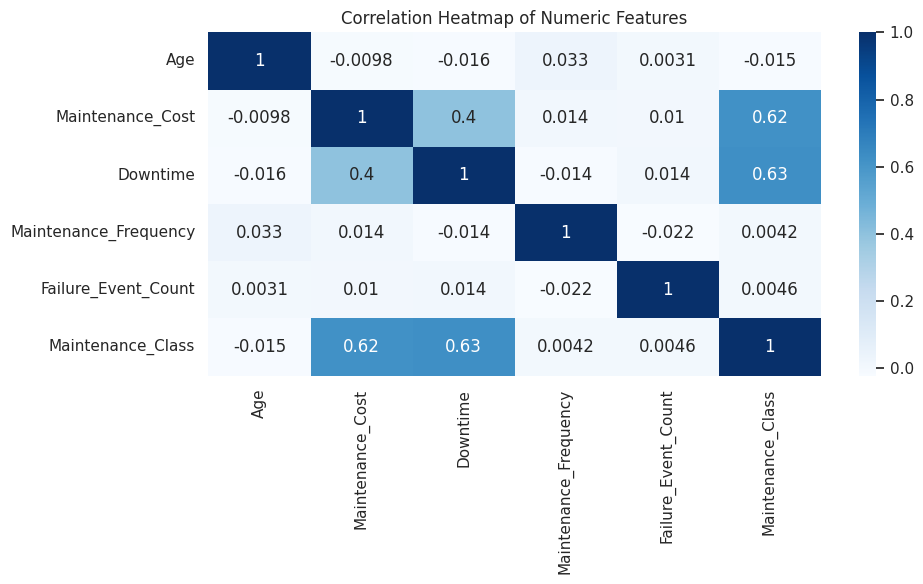

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# **Feature Selection**

# **1.Dispersiv Flies Optimization(DFO)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "target_encoded_dataset.csv"
df = pd.read_csv(file_path)

# Drop ID column if present
if 'ID' in df.columns:
    df = df.drop(columns=['Device_ID'])

# Define features and target
target_column = "Maintenance_Report"
X = df.drop(columns=['Maintenance_Report'])
y = df[target_column]

num_features = X.shape[1]  # Total number of features
num_flies = 10  # Population size
iterations = 10

# DFO Parameters
gamma = 0.5
delta = 0.1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize flies randomly (binary values 0 or 1)
population = np.random.choice([0, 1], size=(num_flies, num_features))

# Fitness function: Evaluate feature subset using classification accuracy
def fitness(solution):
    selected_features = np.where(solution == 1)[0]
    if len(selected_features) == 0:
        return 0
    clf = RandomForestClassifier()
    clf.fit(X_train.iloc[:, selected_features], y_train)
    y_pred = clf.predict(X_test.iloc[:, selected_features])
    return accuracy_score(y_test, y_pred)

# Main DFO function
def dispersive_flies_optimization():
    global population

    for t in range(iterations):
        # Evaluate fitness
        fitness_values = np.array([fitness(fly) for fly in population])

        # Find the best fly
        best_index = np.argmax(fitness_values)
        best_fly = population[best_index].copy()

        # Update each fly
        for i in range(num_flies):
            if i == best_index:
                continue  # Skip best fly

            for j in range(num_features):
                if np.random.rand() < gamma:
                    population[i, j] = best_fly[j]  # Move towards the best fly
                if np.random.rand() < delta:
                    population[i, j] = 1 - population[i, j]

        # Slightly perturb the best fly for better exploration
        for j in range(num_features):
            if np.random.rand() < delta:
                best_fly[j] = 1 - best_fly[j]
        population[best_index] = best_fly

        print(f"Iteration {t+1}: Best Accuracy = {fitness(best_fly):.4f}")

# Run DFO optimization
dispersive_flies_optimization()

# Final selected feature subset
final_fly = population[np.argmax([fitness(fly) for fly in population])]
selected_feature_indices = np.where(final_fly == 1)[0]
selected_feature_names = X.columns[selected_feature_indices].tolist()

if len(selected_feature_names) == 0:
    print("\nNo features were selected. Exiting.")
else:
    print("\nFinal Selected Features:", selected_feature_names)

# Create new dataset with selected features and target column
new_dataset = df[selected_feature_names + [target_column]]
new_dataset.to_csv("DFO_1.csv", index=False)
print("\nNew dataset saved as 'DFO_1.csv'")

Iteration 1: Best Accuracy = 0.7639
Iteration 2: Best Accuracy = 0.7651
Iteration 3: Best Accuracy = 0.7602
Iteration 4: Best Accuracy = 0.7651
Iteration 5: Best Accuracy = 0.5976
Iteration 6: Best Accuracy = 0.7651
Iteration 7: Best Accuracy = 0.7651
Iteration 8: Best Accuracy = 0.7651
Iteration 9: Best Accuracy = 0.7651
Iteration 10: Best Accuracy = 0.7096

Final Selected Features: ['Device_ID', 'Device_Type', 'Age', 'Manufacturer', 'Country', 'Maintenance_Class']

New dataset saved as 'DFO_1.csv'


In [ ]:
 import time

# Load dataset
file_path = "/content/normalized_dataset.csv"
df = pd.read_csv(file_path)

# Drop ID column if present
if 'ID' in df.columns:
    df = df.drop(columns=['Device_ID'])

# Define features and target
target_column = "Maintenance_Report"
X = df.drop(columns=['Maintenance_Report'])
y = df[target_column]

num_features = X.shape[1]
num_flies = 10
iterations = 10

# DFO Parameters
gamma = 0.5
delta = 0.1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize flies randomly (binary values 0 or 1)
population = np.random.choice([0, 1], size=(num_flies, num_features))

# Fitness function: Evaluate feature subset using classification accuracy
def fitness(solution):
    selected_features = np.where(solution == 1)[0]
    if len(selected_features) == 0:
        return 0
    clf = RandomForestClassifier()
    clf.fit(X_train.iloc[:, selected_features], y_train)
    y_pred = clf.predict(X_test.iloc[:, selected_features])
    return accuracy_score(y_test, y_pred)

# Max allowed runtime in seconds
max_runtime = 600
start_time = time.time()

# Main DFO function with runtime limit
def dispersive_flies_optimization():
    global population

    for t in range(iterations):
        elapsed_time = time.time() - start_time
        if elapsed_time > max_runtime:
            print("\n Time limit reached! Stopping early.")
            break

        # Evaluate fitness
        fitness_values = np.array([fitness(fly) for fly in population])

        # Find the best fly
        best_index = np.argmax(fitness_values)
        best_fly = population[best_index].copy()

        # Update each fly
        for i in range(num_flies):
            if i == best_index:
                continue  # Skip best fly

            for j in range(num_features):
                if np.random.rand() < gamma:
                    population[i, j] = best_fly[j]
                if np.random.rand() < delta:
                    population[i, j] = 1 - population[i, j]

        # Slightly perturb the best fly for better exploration
        for j in range(num_features):
            if np.random.rand() < delta:
                best_fly[j] = 1 - best_fly[j]
        population[best_index] = best_fly

        print(f"Iteration {t+1}: Best Accuracy = {fitness(best_fly):.4f}")

# Run DFO optimization
dispersive_flies_optimization()

# Final selected feature subset
final_fly = population[np.argmax([fitness(fly) for fly in population])]
selected_feature_indices = np.where(final_fly == 1)[0]

# Fix: Extract correct feature names
selected_feature_names = X.columns[selected_feature_indices].tolist()

if len(selected_feature_names) == 0:
    print("\nNo features were selected. Exiting.")
else:
    print("\nFinal Selected Features:", selected_feature_names)

    # Create new dataset with selected features and target column
    new_dataset = df[selected_feature_names + [target_column]]
    new_dataset.to_csv("DFO_2.csv", index=False)
    print("\nNew dataset saved as 'DFO_2.csv'")

Iteration 1: Best Accuracy = 0.0012
Iteration 2: Best Accuracy = 0.0000

 Time limit reached! Stopping early.

Final Selected Features: ['Device_ID', 'Device_Type', 'Age', 'Manufacturer', 'Maintenance_Cost', 'Maintenance_Class']

New dataset saved as 'DFO_2.csv'


# **2.Fish School Search (FSS)**

In [ ]:
from sklearn. preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random

# Load dataset
dataset_path = "target_encoded_dataset.csv"
df = pd.read_csv(dataset_path)

# Define target variable
target_column = "Maintenance_Report"
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fish School Search (FSS) Parameters
num_fish = 10  # Number of fish
num_features = X_train.shape[1]  # Total features
iterations = 10  # Max iterations
initial_step_size = 2  # Initial step size
step_size = initial_step_size
max_runtime = 300  # Maximum runtime in seconds (5 minutes)

# Timer start
start_time = time.time()

def evaluate_fitness(subset):
    selected_features = np.where(subset == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets
    X_train_sel = X_train[:, selected_features]
    X_test_sel = X_test[:, selected_features]
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_sel, y_train)
    predictions = clf.predict(X_test_sel)
    return accuracy_score(y_test, predictions)

# Initialize fish population
fish_population = np.random.randint(0, 2, (num_fish, num_features))
weights = np.ones(num_fish)  # Initial weights
fitness = np.array([evaluate_fitness(fish) for fish in fish_population])

def compute_barycenter(fish_population, weights):
    weighted_sum = np.sum(fish_population * weights[:, np.newaxis], axis=0)
    total_weight = np.sum(weights)
    return (weighted_sum / total_weight) > 0.5

# Main FSS loop
for iter in range(iterations):
    iteration_start_time = time.time()

    # Stop execution if max runtime is exceeded
    if time.time() - start_time > max_runtime:
        print("\nMaximum runtime exceeded! Stopping optimization.")
        break

    # Step 1: Individual Movement
    random_values = np.random.uniform(-1, 1, (num_fish, num_features))
    flip_mask = (np.abs(random_values) * step_size) > 1
    new_population = np.where(flip_mask, 1 - fish_population, fish_population)
    new_fitness = np.array([evaluate_fitness(fish) for fish in new_population])

    # Step 2: Feeding & Weight Update
    delta_fitness = new_fitness - fitness
    weights += delta_fitness
    weights = np.clip(weights, 0.1, None)

    # Step 3: Update fish positions if fitness improves
    improved_mask = delta_fitness > 0
    fish_population[improved_mask] = new_population[improved_mask]
    fitness[improved_mask] = new_fitness[improved_mask]

    # Step 4: Compute Barycenter (Collective Movement)
    best_fish = compute_barycenter(fish_population, weights)
    for i in range(num_fish):
        if random.random() < 0.5:
            fish_population[i] = best_fish

    # Step 5: Reduce Step Size Gradually
    step_size *= 0.99

    iteration_end_time = time.time()  # End iteration timer
    iteration_time = iteration_end_time - iteration_start_time

    print(f"Iteration {iter+1}: Best Accuracy = {max(fitness):.4f}, Time Taken = {iteration_time:.2f} seconds")

# Final best subset
best_fish = fish_population[np.argmax(fitness)]
selected_feature_indices = np.where(best_fish == 1)[0]

# Fix: Correctly extract feature names from df.columns
selected_feature_names = X.columns[selected_feature_indices].tolist()

if len(selected_feature_names) == 0:
    print("\nNo features were selected. Exiting.")
else:
    print("\nBest selected features:", selected_feature_names)

    # Create New Dataset with Selected Features
    new_df = df[selected_feature_names + [target_column]]
    new_df.to_csv('FSS_1.csv', index=False)
    print("\nNew dataset with selected features saved as 'FSS_1.csv'")

Iteration 1: Best Accuracy = 0.7639, Time Taken = 0.34 seconds
Iteration 2: Best Accuracy = 0.7651, Time Taken = 0.24 seconds
Iteration 3: Best Accuracy = 0.7651, Time Taken = 0.28 seconds
Iteration 4: Best Accuracy = 0.7651, Time Taken = 0.31 seconds
Iteration 5: Best Accuracy = 0.7651, Time Taken = 0.29 seconds
Iteration 6: Best Accuracy = 0.7651, Time Taken = 0.30 seconds
Iteration 7: Best Accuracy = 0.7651, Time Taken = 0.34 seconds
Iteration 8: Best Accuracy = 0.7651, Time Taken = 0.29 seconds
Iteration 9: Best Accuracy = 0.7651, Time Taken = 0.29 seconds
Iteration 10: Best Accuracy = 0.7651, Time Taken = 0.23 seconds

Best selected features: ['Age', 'Model', 'Maintenance_Frequency', 'Failure_Event_Count']

New dataset with selected features saved as 'FSS_1.csv'


In [ ]:
import numpy as np
import pandas as pd
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
dataset_path = "/content/normalized_dataset.csv"
df = pd.read_csv(dataset_path)

# Define target variable
target_column = "Maintenance_Report"
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fish School Search (FSS) Parameters
num_fish = 10  # Number of fish
num_features = X_train.shape[1]  # Total features
iterations = 10  # Max iterations
initial_step_size = 2  # Initial step size
step_size = initial_step_size
max_runtime = 300  # Maximum runtime in seconds (5 minutes)

# Timer start
start_time = time.time()

def evaluate_fitness(subset):
    selected_features = np.where(subset == 1)[0]
    if len(selected_features) == 0:
        return 0  # Avoid empty feature sets
    X_train_sel = X_train[:, selected_features]
    X_test_sel = X_test[:, selected_features]
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_sel, y_train)
    predictions = clf.predict(X_test_sel)
    return accuracy_score(y_test, predictions)

# Initialize fish population
fish_population = np.random.randint(0, 2, (num_fish, num_features))
weights = np.ones(num_fish)  # Initial weights
fitness = np.array([evaluate_fitness(fish) for fish in fish_population])

def compute_barycenter(fish_population, weights):
    weighted_sum = np.sum(fish_population * weights[:, np.newaxis], axis=0)
    total_weight = np.sum(weights)
    return (weighted_sum / total_weight) > 0.5  # Majority voting for feature selection

# Main FSS loop
for iter in range(iterations):
    iteration_start_time = time.time()  # Start iteration timer

    # Stop execution if max runtime is exceeded
    if time.time() - start_time > max_runtime:
        print("\nMaximum runtime exceeded! Stopping optimization.")
        break

    # Step 1: Individual Movement
    random_values = np.random.uniform(-1, 1, (num_fish, num_features))
    flip_mask = (np.abs(random_values) * step_size) > 1
    new_population = np.where(flip_mask, 1 - fish_population, fish_population)
    new_fitness = np.array([evaluate_fitness(fish) for fish in new_population])

    # Step 2: Feeding & Weight Update
    delta_fitness = new_fitness - fitness
    weights += delta_fitness
    weights = np.clip(weights, 0.1, None)  # Ensure positive weights

    # Step 3: Update fish positions if fitness improves
    improved_mask = delta_fitness > 0
    fish_population[improved_mask] = new_population[improved_mask]
    fitness[improved_mask] = new_fitness[improved_mask]

    # Step 4: Compute Barycenter (Collective Movement)
    best_fish = compute_barycenter(fish_population, weights)
    for i in range(num_fish):
        if random.random() < 0.5:
            fish_population[i] = best_fish

    # Step 5: Reduce Step Size Gradually
    step_size *= 0.99

    iteration_end_time = time.time()  # End iteration timer
    iteration_time = iteration_end_time - iteration_start_time  # Compute iteration time

    print(f"Iteration {iter+1}: Best Accuracy = {max(fitness):.4f}, Time Taken = {iteration_time:.2f} seconds")

# Final best subset
best_fish = fish_population[np.argmax(fitness)]
selected_feature_indices = np.where(best_fish == 1)[0]

# Fix: Correctly extract feature names from df.columns
selected_feature_names = X.columns[selected_feature_indices].tolist()

if len(selected_feature_names) == 0:
    print("\nNo features were selected. Exiting.")
else:
    print("\nBest selected features:", selected_feature_names)

    # Create New Dataset with Selected Features
    new_df = df[selected_feature_names + [target_column]]
    new_df.to_csv('FSS_2.csv', index=False)
    print("\nNew dataset with selected features saved as 'FSS_2.csv'")

Iteration 1: Best Accuracy = 0.0012, Time Taken = 87.58 seconds
Iteration 2: Best Accuracy = 0.0012, Time Taken = 94.17 seconds
Iteration 3: Best Accuracy = 0.0024, Time Taken = 93.86 seconds

Maximum runtime exceeded! Stopping optimization.

Best selected features: ['Age', 'Maintenance_Cost']

New dataset with selected features saved as 'FSS_2.csv'


# **3.Frog - Snake Prey- Predator Realtionship Optimization (FSRO)**

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "target_encoded_dataset.csv"
df = pd.read_csv(file_path)

# Define target and features
target_column = "Maintenance_Report"
features = [col for col in df.columns if col != target_column and col != "Device_ID"]
X = df[features]
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FSRO Parameters
num_frogs = 10
num_features = len(features)
num_memeplexes = 2  # Dividing frogs into groups
max_iter = 10
alpha = 0.5  # Probability of moving toward the best frog
elimination_threshold = 0.2
max_runtime = 300
# Initialize frogs with random feature subsets
def initialize_frogs(num_frogs, num_features):
    frogs = np.random.randint(0, 2, (num_frogs, num_features))  # Binary feature selection
    for i in range(num_frogs):
        if np.sum(frogs[i]) == 0:
            frogs[i, np.random.randint(0, num_features)] = 1
    return frogs

# Evaluate fitness (model accuracy)
def evaluate_fitness(frogs):
    accuracies = []
    for frog in frogs:
        selected_features = [features[i] for i in range(num_features) if frog[i] == 1]
        if len(selected_features) == 0:
            accuracies.append(0)
            continue
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train[selected_features], y_train)
        preds = model.predict(X_test[selected_features])
        accuracies.append(accuracy_score(y_test, preds))
    return np.array(accuracies)

# Select memeplexes
def form_memeplexes(frogs, fitness):
    sorted_indices = np.argsort(-fitness)  # Sort frogs by fitness (descending)
    memeplexes = np.array_split(frogs[sorted_indices], num_memeplexes)
    return memeplexes

# Local search within memeplexes
def local_search(memeplex):
    best_frog = memeplex[0]
    for i in range(1, len(memeplex)):
        if np.random.rand() < alpha:
            memeplex[i] = np.where(np.random.rand(num_features) < alpha, best_frog, memeplex[i])
    return memeplex

# Global movement toward the best frog
def snake_predation(frogs, best_frog):
    movement_prob = np.random.rand(*frogs.shape)  # Probability matrix for gradual movement
    return np.where(movement_prob < alpha, best_frog, frogs)

# Feature importance-guided random moves
def feature_guided_move(frog, feature_importance):
    importance_threshold = np.median(feature_importance)
    for i in range(num_features):
        if np.random.rand() < 0.3:
            if feature_importance[i] > importance_threshold:
                frog[i] = 1
            else:
                frog[i] = 0
    return frog

# FSRO Execution with Timer
frogs = initialize_frogs(num_frogs, num_features)
start_time = time.time()

for iteration in range(max_iter):
    elapsed_time = time.time() - start_time
    if elapsed_time > max_runtime:
        print("\n Time limit reached! Stopping early.")
        break

    fitness = evaluate_fitness(frogs)
    best_idx = np.argmax(fitness)
    best_frog = frogs[best_idx]

    # Form memeplexes
    memeplexes = form_memeplexes(frogs, fitness)

    # Apply local search
    for i in range(len(memeplexes)):
        elapsed_time = time.time() - start_time
        if elapsed_time > max_runtime:
            print("\n Time limit reached during iteration! Stopping early.")
            break
        memeplexes[i] = local_search(memeplexes[i])

    # Merge back the memeplexes
    frogs = np.vstack(memeplexes)

    # Global movement (snake predation)
    elapsed_time = time.time() - start_time
    if elapsed_time > max_runtime:
        print("\n Time limit reached during iteration! Stopping early.")
        break
    frogs = snake_predation(frogs, best_frog)

    # Feature importance-based guided move
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_
    for i in range(num_frogs):
        elapsed_time = time.time() - start_time
        if elapsed_time > max_runtime:
            print("\n Time limit reached during iteration! Stopping early.")
            break
        frogs[i] = feature_guided_move(frogs[i], feature_importance)

    # Eliminate weak frogs and replace them with new ones
    min_fitness_idx = np.argmin(fitness)
    if fitness[min_fitness_idx] < elimination_threshold:
        frogs[min_fitness_idx] = initialize_frogs(1, num_features)[0]

    print(f"Iteration {iteration + 1}: Best Accuracy = {max(fitness):.2f}")

# Final selected features
final_selected_features = [features[i] for i in range(num_features) if best_frog[i] == 1]
print("\nFinal Selected Features:", final_selected_features)

# Create New Dataset with Selected Features
new_df = df[final_selected_features + [target_column]]
new_df.to_csv('FSRO_1.csv', index=False)
print("New dataset with selected features saved as 'FSRO_1.csv'")

Iteration 1: Best Accuracy = 0.77
Iteration 2: Best Accuracy = 0.71
Iteration 3: Best Accuracy = 0.73
Iteration 4: Best Accuracy = 0.73
Iteration 5: Best Accuracy = 0.73
Iteration 6: Best Accuracy = 0.73
Iteration 7: Best Accuracy = 0.73
Iteration 8: Best Accuracy = 0.73
Iteration 9: Best Accuracy = 0.73
Iteration 10: Best Accuracy = 0.73

Final Selected Features: ['Purchase_Date', 'Maintenance_Cost', 'Downtime', 'Maintenance_Frequency', 'Failure_Event_Count', 'Maintenance_Class']
New dataset with selected features saved as 'FSRO_1.csv'


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/normalized_dataset.csv"
df = pd.read_csv(file_path)

# Define target and features
target_column = "Maintenance_Report"
features = [col for col in df.columns if col != target_column and col != "Device_ID"]
X = df[features]
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FSRO Parameters
num_frogs = 10
num_features = len(features)
num_memeplexes = 2
max_iter = 10
alpha = 0.5
elimination_threshold = 0.2

max_runtime = 300

# Initialize frogs with random feature subsets
def initialize_frogs(num_frogs, num_features):
    frogs = np.random.randint(0, 2, (num_frogs, num_features))
    for i in range(num_frogs):
        if np.sum(frogs[i]) == 0:
            frogs[i, np.random.randint(0, num_features)] = 1
    return frogs

# Evaluate fitness (model accuracy)
def evaluate_fitness(frogs):
    accuracies = []
    for frog in frogs:
        selected_features = [features[i] for i in range(num_features) if frog[i] == 1]
        if len(selected_features) == 0:
            accuracies.append(0)
            continue
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train[selected_features], y_train)
        preds = model.predict(X_test[selected_features])
        accuracies.append(accuracy_score(y_test, preds))
    return np.array(accuracies)

# Select memeplexes
def form_memeplexes(frogs, fitness):
    sorted_indices = np.argsort(-fitness)  # Sort frogs by fitness (descending)
    memeplexes = np.array_split(frogs[sorted_indices], num_memeplexes)
    return memeplexes

# Local search within memeplexes
def local_search(memeplex):
    best_frog = memeplex[0]
    for i in range(1, len(memeplex)):
        if np.random.rand() < alpha:
            memeplex[i] = np.where(np.random.rand(num_features) < alpha, best_frog, memeplex[i])
    return memeplex

# Global movement  toward the best frog
def snake_predation(frogs, best_frog):
    movement_prob = np.random.rand(*frogs.shape)
    return np.where(movement_prob < alpha, best_frog, frogs)

# Feature importance-guided random moves
def feature_guided_move(frog, feature_importance):
    importance_threshold = np.median(feature_importance)
    for i in range(num_features):
        if np.random.rand() < 0.3:
            if feature_importance[i] > importance_threshold:
                frog[i] = 1
            else:
                frog[i] = 0
    return frog

# FSRO Execution with Timer
frogs = initialize_frogs(num_frogs, num_features)
start_time = time.time()

for iteration in range(max_iter):
    elapsed_time = time.time() - start_time
    if elapsed_time > max_runtime:
        print("\n Time limit reached! Stopping early.")
        break
    fitness = evaluate_fitness(frogs)
    best_idx = np.argmax(fitness)
    best_frog = frogs[best_idx]

    # Form memeplexes
    memeplexes = form_memeplexes(frogs, fitness)

    # Apply local search
    for i in range(len(memeplexes)):
        elapsed_time = time.time() - start_time
        if elapsed_time > max_runtime:
            print("\n  Time limit reached during iteration! Stopping early.")
            break
        memeplexes[i] = local_search(memeplexes[i])

    # Merge back the memeplexes
    frogs = np.vstack(memeplexes)

    # Global movement
    elapsed_time = time.time() - start_time
    if elapsed_time > max_runtime:
        print("\n Time limit reached during iteration! Stopping early.")
        break
    frogs = snake_predation(frogs, best_frog)

    # Feature importance-based guided move
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_
    for i in range(num_frogs):
        elapsed_time = time.time() - start_time
        if elapsed_time > max_runtime:
            print("\n Time limit reached during iteration! Stopping early.")
            break
        frogs[i] = feature_guided_move(frogs[i], feature_importance)

    # Eliminate weak frogs and replace them with new ones
    min_fitness_idx = np.argmin(fitness)
    if fitness[min_fitness_idx] < elimination_threshold:
        frogs[min_fitness_idx] = initialize_frogs(1, num_features)[0]

    print(f"Iteration {iteration + 1}: Best Accuracy = {max(fitness):.2f}")

# Final selected features
final_selected_features = [features[i] for i in range(num_features) if best_frog[i] == 1]
print("\nFinal Selected Features:", final_selected_features)

# Create New Dataset with Selected Features
new_df = df[final_selected_features + [target_column]]
new_df.to_csv('FSRO_2.csv', index=False)
print("New dataset with selected features saved as 'FSRO_2.csv'")


  Time limit reached during iteration! Stopping early.

 Time limit reached during iteration! Stopping early.

Final Selected Features: ['Age', 'Country', 'Maintenance_Cost', 'Downtime', 'Maintenance_Class']
New dataset with selected features saved as 'FSRO_2.csv'


# **4. Principal Component Analysis (PCA)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("target_encoded_dataset.csv")
X = df.drop(columns=['Maintenance_Report']).values
y = df['Maintenance_Report'].values
feature_names = df.drop(columns=['Maintenance_Report']).columns

# Step 1: Standardize the data (PCA works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA on the original features
pca = PCA(n_components=X.shape[1])  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Step 3: Analyze explained variance to decide how many components to keep
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Select the number of components that explain at least 95% of variance
selected_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Selected {selected_components} principal components covering 95% of variance.")

# Step 4: Identify the most important original features
pca_loadings = np.abs(pca.components_[:selected_components])  # Get absolute values of loadings
feature_importance = np.sum(pca_loadings, axis=0)  # Sum contributions per feature
selected_features_indices = np.argsort(feature_importance)[-selected_components:]  # Top features
selected_feature_names = feature_names[selected_features_indices]

# Step 5: Display selected features
print("\nSelected Features based on PCA:")
print(selected_feature_names.tolist())

# Step 6: Create new dataset with selected original features
X_selected = X[:, selected_features_indices]  # Keep only selected features
df_selected = pd.DataFrame(X_selected, columns=selected_feature_names)
df_selected['efs'] = y  # Add target column

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 8: Train a classifier on selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy after PCA-Based Feature Selection: {accuracy:.4f}")

# Step 10: Save the selected feature dataset
df_selected.to_csv("PCA_1.csv", index=False)
print("\nDataset with PCA-selected features saved as 'PCA_1.csv'")

Selected 5 principal components covering 95% of variance.

Selected Features based on PCA:
['Device_ID', 'Age', 'Purchase_Date', 'Downtime', 'Maintenance_Cost']

Model Accuracy after PCA-Based Feature Selection: 0.7301

Dataset with PCA-selected features saved as 'PCA_1.csv'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/normalized_dataset.csv")
X = df.drop(columns=['Maintenance_Frequency']).values
y = df['Maintenance_Frequency'].values
feature_names = df.drop(columns=['Maintenance_Frequency']).columns

# Step 1: Standardize the data (PCA works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA on the original features
pca = PCA(n_components=X.shape[1])  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# Step 3: Analyze explained variance to decide how many components to keep
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Select the number of components that explain at least 95% of variance
selected_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Selected {selected_components} principal components covering 95% of variance.")

# Step 4: Identify the most important original features
pca_loadings = np.abs(pca.components_[:selected_components])  # Get absolute values of loadings
feature_importance = np.sum(pca_loadings, axis=0)  # Sum contributions per feature
selected_features_indices = np.argsort(feature_importance)[-selected_components:]  # Top features
selected_feature_names = feature_names[selected_features_indices]

# Step 5: Display selected features
print("\nSelected Features based on PCA:")
print(selected_feature_names.tolist())

# Step 6: Create new dataset with selected original features
X_selected = X[:, selected_features_indices]  # Keep only selected features
df_selected = pd.DataFrame(X_selected, columns=selected_feature_names)
df_selected['efs'] = y  # Add target column

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 8: Train a classifier on selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy after PCA-Based Feature Selection: {accuracy:.4f}")

# Step 10: Save the selected feature dataset
df_selected.to_csv("PCA_2.csv", index=False)
print("\nDataset with PCA-selected features saved as 'PCA_2.csv'")

Selected 10 principal components covering 95% of variance.

Selected Features based on PCA:
['Purchase_Date', 'Downtime', 'Maintenance_Cost', 'Device_Type', 'Manufacturer', 'Country', 'Maintenance_Report', 'Model', 'Failure_Event_Count', 'Device_ID']

Model Accuracy after PCA-Based Feature Selection: 0.2072

Dataset with PCA-selected features saved as 'PCA_2.csv'


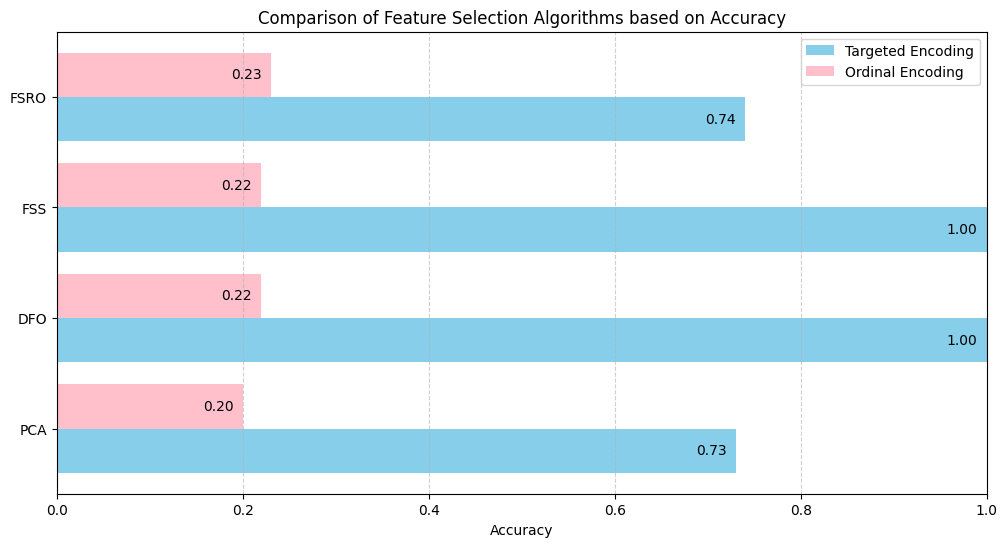

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define algorithm names
algorithm_names = [
    "FSRO","FSS","DFO","PCA"
]

# Replace these with actual accuracy values from your experiments
accuracy_values_targeted = [
    0.74,1.00,1.00,0.73]

accuracy_values_ordinal = [
    0.23,0.22,0.22,0.20]

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
indices = np.arange(len(algorithm_names))

plt.barh(indices + bar_width / 2, accuracy_values_targeted, bar_width, label='Targeted Encoding', color='skyblue')
plt.barh(indices - bar_width / 2, accuracy_values_ordinal, bar_width, label='Ordinal Encoding', color='pink')

plt.xlabel("Accuracy")
plt.title("Comparison of Feature Selection Algorithms based on Accuracy")
plt.xlim(0.0, 1.0)
plt.yticks(indices, algorithm_names)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()

# Show values on bars
for index, value in enumerate(accuracy_values_targeted):
    plt.text(value - 0.01, index + bar_width / 2, f"{value:.2f}", va='center', ha='right', fontsize=10)

for index, value in enumerate(accuracy_values_ordinal):
    plt.text(value - 0.01, index - bar_width / 2, f"{value:.2f}", va='center', ha='right', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis to have the best accuracy at the top
plt.show()

# **Model Building**

# **1.XGbooster**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost model trained on full dataset
Accuracy: 0.9809592672933237
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       676
           1       0.97      0.99      0.98       750
           2       0.99      0.96      0.97      1297
           3       0.98      0.98      0.98       729
           4       0.98      1.00      0.99       697

    accuracy                           0.98      4149
   macro avg       0.98      0.99      0.98      4149
weighted avg       0.98      0.98      0.98      4149



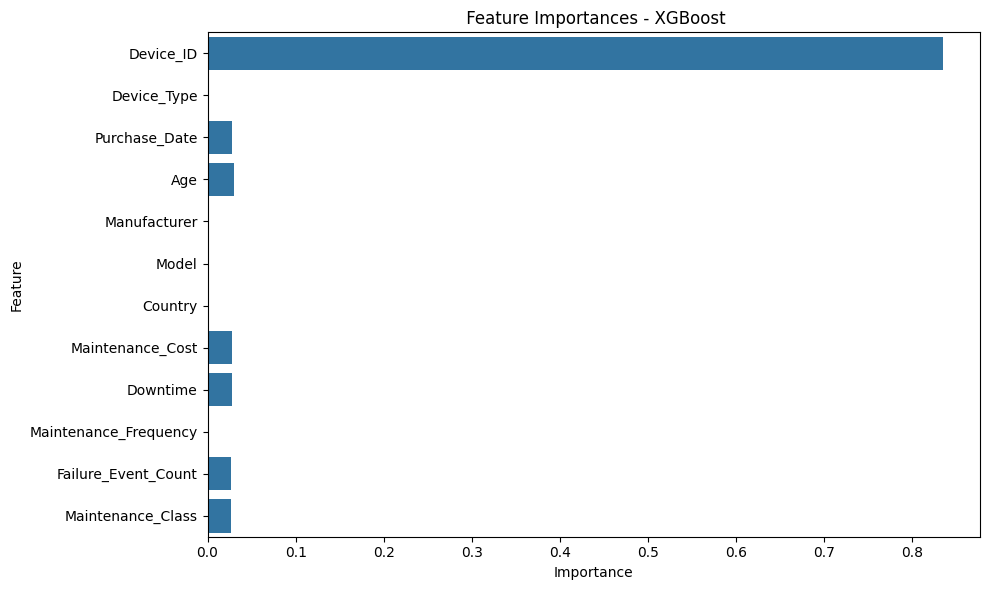

Predictions saved to 'xgboost_classification_output.csv'
 Model, label encoder, and feature list saved for future user-input prediction.


In [12]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
df = pd.read_csv('/content/target_encoded_dataset.csv')

# Define target column
target_col = 'Maintenance_Report'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Always create a label encoder and fit to y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train the XGBoost classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X, y_encoded)

# Predict
y_pred = model.predict(X)

# Evaluate
print(" XGBoost model trained on full dataset")
print("Accuracy:", accuracy_score(y_encoded, y_pred))
print("Classification Report:\n", classification_report(y_encoded, y_pred))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title(" Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Save predictions
df['predicted_' + target_col] = label_encoder.inverse_transform(y_pred)
df.to_csv('xgboost_classification_output.csv', index=False)
print("Predictions saved to 'xgboost_classification_output.csv'")

device_type_encoder = LabelEncoder()
device_type_encoder.fit(df['Device_Type'])
target_col = 'Maintenance_Report'
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])


# Save it
joblib.dump(device_type_encoder, 'device_type_encoder.pkl')
joblib.dump(model, 'best_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(list(X.columns), 'feature_list.pkl')
print(" Model, label encoder, and feature list saved for future user-input prediction.")

 Model trained on full numerical dataset
Accuracy: 0.6382260785731502
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       0.00      0.00      0.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.50      1.00      0.67         2
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         1
         7.0       0.50      1.00      0.67         2
         8.0       1.00      1.00      1.00         1
         9.0       1.00      1.00      1.00         1
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       1.00      1.00      1.00         1
        13.0       0.50      1.00      0.67         1
        14.0       0.00      0.00      0.00         1
        15.0       0.33      1.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


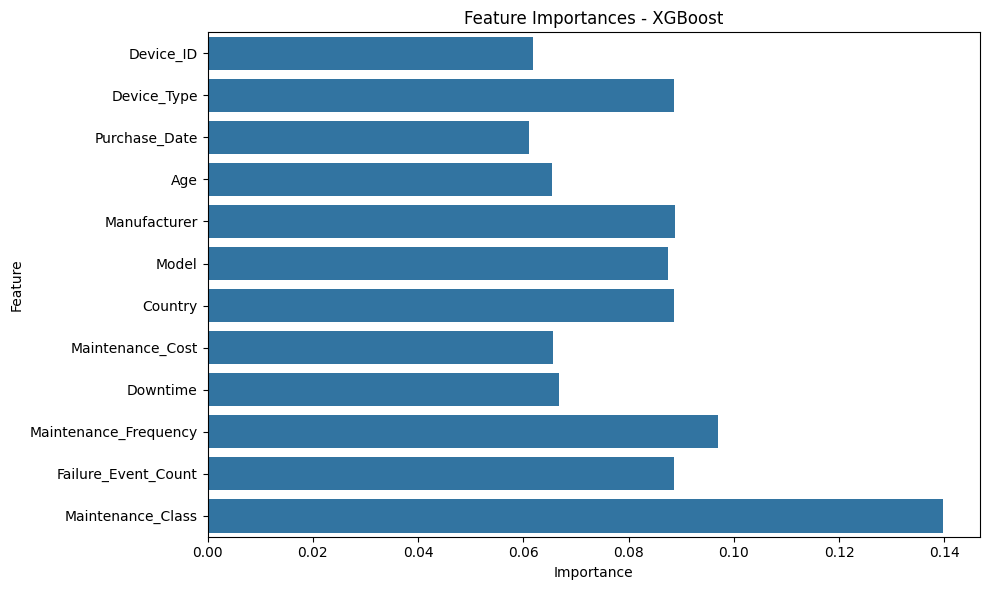

 Predictions saved to 'xgboost_classification_output.csv'


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/normalized_dataset.csv')

# Define target column
target_col = 'Maintenance_Report'

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Label Encode target column if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train model on the entire dataset using XGBoost
model = XGBClassifier(random_state=42)
model.fit(X, y)

# Predict on the same dataset
y_pred = model.predict(X)

# Evaluation
print(" Model trained on full numerical dataset")
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

# Feature importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Save predictions
df['predicted_' + target_col] = y_pred
df.to_csv('xgboost_classification_output.csv', index=False)
print(" Predictions saved to 'xgboost_classification_output.csv'")

# **Adaptive Boosting**

 Model trained on full numerical dataset using AdaBoost
Accuracy: 0.767172812725958
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       676
           1       0.71      0.79      0.75       750
           2       0.86      0.55      0.67      1297
           3       0.74      0.80      0.77       729
           4       0.75      0.94      0.84       697

    accuracy                           0.77      4149
   macro avg       0.77      0.80      0.77      4149
weighted avg       0.78      0.77      0.76      4149



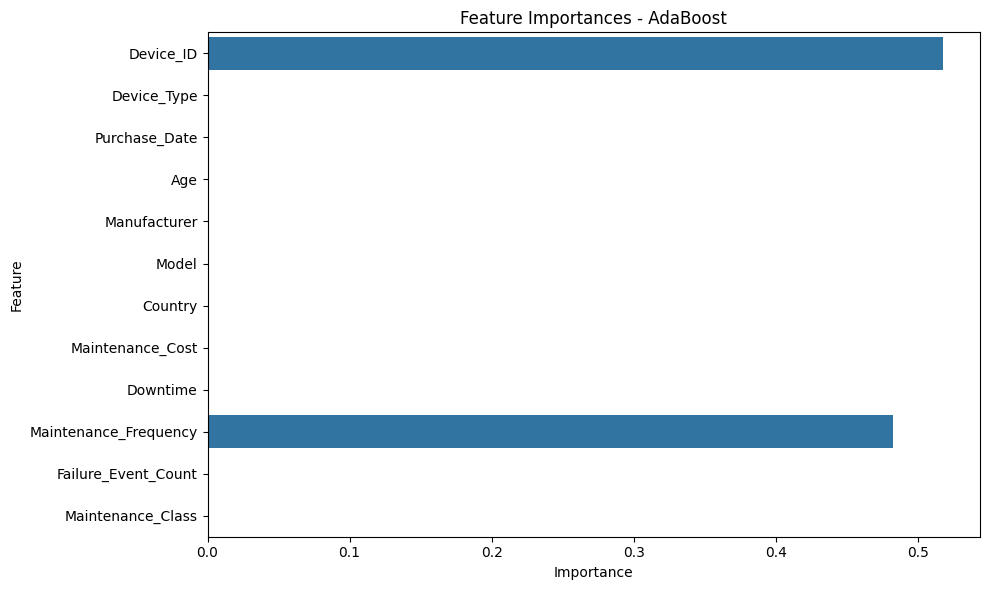

 Predictions saved to 'adaboost_classification_output.csv'


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/target_encoded_dataset.csv')

# Define target column
target_col = 'Maintenance_Report'

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Label Encode target column if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Initialize AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
model.fit(X, y)

# Predict on the same dataset
y_pred = model.predict(X)

# Evaluation
print(" Model trained on full numerical dataset using AdaBoost")
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

# Feature importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances - AdaBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Save predictions
df['predicted_' + target_col] = y_pred
df.to_csv('adaboost_classification_output.csv', index=False)
print(" Predictions saved to 'adaboost_classification_output.csv'")

 Model trained on full numerical dataset using AdaBoost
Accuracy: 0.0028922631959508315
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


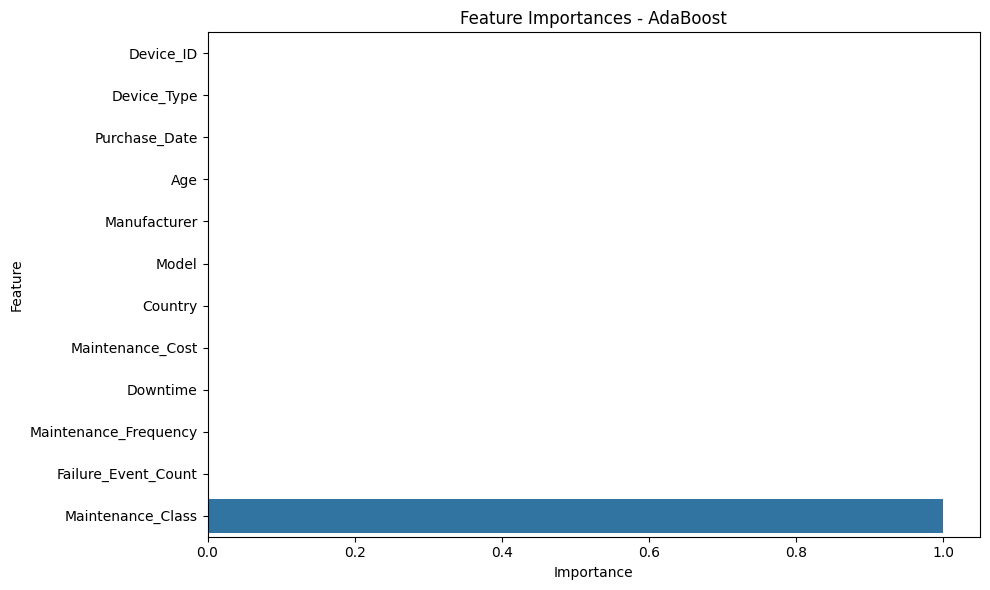

 Predictions saved to 'adaboost_classification_output.csv'


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/normalized_dataset.csv')

# Define target column
target_col = 'Maintenance_Report'

# Separate features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Label Encode target column if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Initialize AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
model.fit(X, y)

# Predict on the same dataset
y_pred = model.predict(X)

# Evaluation
print(" Model trained on full numerical dataset using AdaBoost")
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

# Feature importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances - AdaBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Save predictions
df['predicted_' + target_col] = y_pred
df.to_csv('adaboost_classification_output.csv', index=False)
print(" Predictions saved to 'adaboost_classification_output.csv'")

# **Long-Short Term Memory (LSTM)**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3578 - loss: 1.5419 - val_accuracy: 0.4952 - val_loss: 1.1950
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5410 - loss: 1.1124 - val_accuracy: 0.6518 - val_loss: 0.9375
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6633 - loss: 0.9166 - val_accuracy: 0.7627 - val_loss: 0.8428
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7430 - loss: 0.8403 - val_accuracy: 0.7614 - val_loss: 0.7928
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7512 - loss: 0.7944 - val_accuracy: 0.7651 - val_loss: 0.7615
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7671 - loss: 0.7478 - val_accuracy: 0.7651 - val_loss: 0.7441
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7626 - loss: 0.7520 - val_accuracy: 0.7651 - val_loss: 0.7270
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.7388 - val_accuracy: 0.7651 - val_

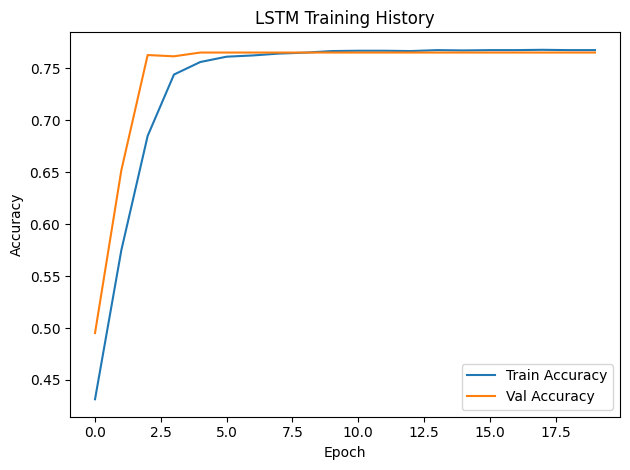

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/target_encoded_dataset.csv')

# Define target column
target_col = 'Maintenance_Report'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for LSTM: (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # 1 timestep

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Multiclass classification

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
print("LSTM Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 9.1837e-05 - loss: 8.1237 - val_accuracy: 0.0000e+00 - val_loss: 8.1519
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0034 - loss: 8.0562 - val_accuracy: 0.0000e+00 - val_loss: 8.6307
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0047 - loss: 7.3789 - val_accuracy: 0.0000e+00 - val_loss: 9.8626
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0121 - loss: 6.4215 - val_accuracy: 0.0000e+00 - val_loss: 11.5492
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0456 - loss: 5.5439 - val_accuracy: 0.0000e+00 - val_loss: 13.1237
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1155 - loss: 4.7352 - val_accuracy: 0.0000e+00 - val_loss: 14.7653
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2226 - loss: 4.0160 - val_accuracy: 0.0000e+00 - val_loss: 16.3224
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3091 - loss:

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

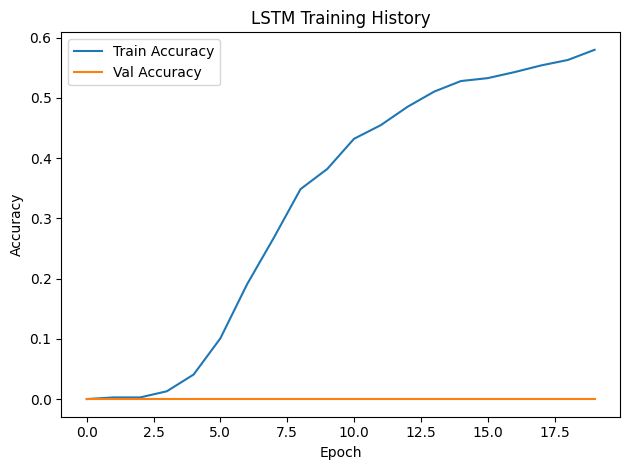

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/normalized_dataset.csv')

# Define target column
target_col = 'Maintenance_Report'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for LSTM: (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # 1 timestep

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Multiclass classification

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
print("LSTM Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

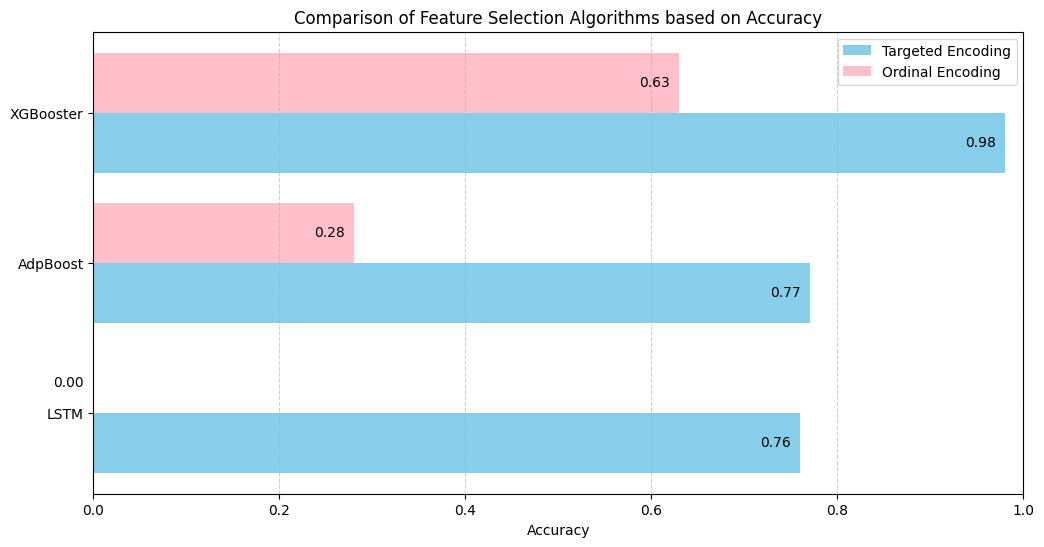

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define algorithm names
algorithm_names = [
    "XGBooster","AdpBoost","LSTM",
]

# Replace these with actual accuracy values from your experiments
accuracy_values_targeted = [
    0.98,0.77,0.76]

accuracy_values_ordinal = [
    0.63,0.28,0.00]

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
indices = np.arange(len(algorithm_names))

plt.barh(indices + bar_width / 2, accuracy_values_targeted, bar_width, label='Targeted Encoding', color='skyblue')
plt.barh(indices - bar_width / 2, accuracy_values_ordinal, bar_width, label='Ordinal Encoding', color='pink')

plt.xlabel("Accuracy")
plt.title("Comparison of Feature Selection Algorithms based on Accuracy")
plt.xlim(0.0, 1.0)
plt.yticks(indices, algorithm_names)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()

# Show values on bars
for index, value in enumerate(accuracy_values_targeted):
    plt.text(value - 0.01, index + bar_width / 2, f"{value:.2f}", va='center', ha='right', fontsize=10)

for index, value in enumerate(accuracy_values_ordinal):
    plt.text(value - 0.01, index - bar_width / 2, f"{value:.2f}", va='center', ha='right', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

In [16]:
import pandas as pd
import joblib

# Load saved components
model = joblib.load('best_model.pkl')                    # Trained XGBoost model
label_encoder = joblib.load('label_encoder.pkl')         # LabelEncoder for target
feature_list = joblib.load('feature_list.pkl')           # Full feature list used in training
device_type_encoder = joblib.load('device_type_encoder.pkl')  # LabelEncoder for Device_Type

# Selected input features
numerical_features = ['Age', 'Maintenance_Class']
categorical_features = ['Device_Type']
target_col = 'Maintenance_Report'

# Step 1: Take input from user
def get_user_input():
    print("\n Please provide the following inputs:")
    user_data = {}

    # Get numerical features
    for feature in numerical_features:
        try:
            user_data[feature] = float(input(f"Enter value for '{feature}': "))
        except ValueError:
            print(f" Invalid input for '{feature}', defaulting to 0.")
            user_data[feature] = 0.0

    # Get and encode categorical feature
    for feature in categorical_features:
        value = input(f"Enter value for '{feature}': ")
        try:
            user_data[feature] = device_type_encoder.transform([value])[0]
        except:
            user_data[feature] = 0

    return pd.DataFrame([user_data])

# Step 2: Complete missing features
def complete_user_input(user_df):
    complete_df = pd.DataFrame(columns=feature_list)
    for col in feature_list:
        complete_df[col] = [0]  # default values
    for col in user_df.columns:
        complete_df[col] = user_df[col]
    return complete_df

# Step 3: Predict
def predict_user_input():
    user_input_df = get_user_input()
    complete_df = complete_user_input(user_input_df)
    prediction = model.predict(complete_df)
    predicted_label = label_encoder.inverse_transform(prediction)
    print(f"\n The predicted value for '{target_col}' is: {predicted_label[0]}")

# Run
predict_user_input()


 Please provide the following inputs:
Enter value for 'Age': 1
Enter value for 'Maintenance_Class': 1
Enter value for 'Device_Type': Infusion Pump

 The predicted value for 'Maintenance_Report' is: 0


In [ ]:
import joblib
joblib.dump(model, 'asset_model.pkl')

['asset_model.pkl']

In [ ]:
from google.colab import files
files.download('asset_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>